## Import Dependencies

### Data Science Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### General Dependencies

In [2]:
import os
import random

### Keras-specific Dependencies

In [3]:
import keras

from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import to_categorical

Using TensorFlow backend.


## Split the dataset into training and testing

### Create key-value pair mapping for Dog ID and breed

In [4]:
# Create separate lists for dog ids and dog breeds
root = "/Users/krithika/Desktop/GitHub Repositories/The-Pup-Files/"

dog_breeds = ['Chihuahua', 'Japanese Spaniel', 'Maltese', 'Pekinese', 'Shih Tzu', 'Blenheim Spaniel', 'Papillion', 
              'Toy Terrier', 'Rhodesian Ridgeback', 'Afghan Hound', 'Basset Hound', 'Beagle', 'Bloodhound', 
              'Bluetick', 'Black And Tan Coonhound', 'Walker Hound', 'English Foxhound', 'Redbone', 'Borzoi', 
              'Irish Wolfhound', 'Italian Greyhound', 'Whippet', 'Ibizan Hound', 'Norwegian Elkhound', 'Otterhound',
              'Saluki', 'Scottish Deerhound', 'Weimaraner', 'Staffordshire Bullterrier', 'American Staffordshire Terrier', 
              'Bedlington Terrier', 'Border Terrier', 'Kerry Blue Terrier', 'Irish Terrier', 'Norfolk Terrier', 
              'Norwich Terrier', 'Yorkshire Terrier', 'Wirehaired Fox Terrier', 'Lakeland Terrier', 'Sealyham Terrier', 
              'Airedale', 'Cairn', 'Australian Terrier', 'Dandie Dinmont', 'Boston Bulldog', 'Miniature Schnauzer', 
              'Giant Schnauzer', 'Standard Schnauzer', 'Scotch Terrier', 'Tibetan Terrier', 'Silky Terrier', 
              'Soft Coated Wheaten Terrier', 'West Highland White Terrier', 'Lhasa Apso', 'Flat Coated Retriever', 
              'Curly Coated Retriever', 'Golden Retriever', 'Labrador Retriever', 'Chesapeake Bay Retriever', 
              'German Short Haired Pointer', 'Vizsla', 'English Setter', 'Irish Setter', 'Gordon Setter', 
              'Brittany Spaniel', 'Clumber', 'English Springer', 'Welsh Springer Spaniel', 'Cocker Spaniel', 'Sussex Spaniel', 
              'Irish Water Spaniel', 'Kuvasz', 'Schipperke', 'Groenendael', 'Malinois', 'Briard', 'Kelpie', 'Komondor', 
              'Old English Sheepdog', 'Shetland Sheepdog', 'Collie', 'Border Collie', 'Bouvier Des Flandres', 'Rottweiler', 
              'German Shephard', 'Doberman', 'Miniature Pinscher', 'Great Swiss Mountain Dog', 'Bernese Mountain Dog', 
              'Appenzeller', 'EntleBucher', 'Boxer', 'Bull Mastiff', 'Tibetan Mastiff', 'French Bulldog', 'Great Dane', 
              'Saint Bernard', 'Eskimo Dog', 'Alaskan Malamute', 'Siberian Husky', 'Affenpinscher', 'Basenji', 'Pug', 
              'Leonberg', 'Newfoundland Terrier', 'Great Pyrenees', 'Samoyed', 'Pomeranian', 'Chow', 'Keeshond', 
              'Brabancon Griffon', 'Pembroke Corgi', 'Cardigan Corgi', 'Toy Poodle', 'Miniature Poodle', 'Standard Poodle', 
              'Mexican Hairless', 'Dingo', 'Dhole', 'African Hunting Dog']

dog_ids = []

folder_names = sorted(os.listdir(root + "Dataset/Images/"))
folder_names.remove('.DS_Store')

for fpath in folder_names:
    dog_ids.append(fpath.split("-")[0])
    
dog_ids_breeds = dict(zip(dog_ids, dog_breeds))

for key, value in dog_ids_breeds.items():
    print(f"{key}: {value}")

n02085620: Chihuahua
n02085782: Japanese Spaniel
n02085936: Maltese
n02086079: Pekinese
n02086240: Shih Tzu
n02086646: Blenheim Spaniel
n02086910: Papillion
n02087046: Toy Terrier
n02087394: Rhodesian Ridgeback
n02088094: Afghan Hound
n02088238: Basset Hound
n02088364: Beagle
n02088466: Bloodhound
n02088632: Bluetick
n02089078: Black And Tan Coonhound
n02089867: Walker Hound
n02089973: English Foxhound
n02090379: Redbone
n02090622: Borzoi
n02090721: Irish Wolfhound
n02091032: Italian Greyhound
n02091134: Whippet
n02091244: Ibizan Hound
n02091467: Norwegian Elkhound
n02091635: Otterhound
n02091831: Saluki
n02092002: Scottish Deerhound
n02092339: Weimaraner
n02093256: Staffordshire Bullterrier
n02093428: American Staffordshire Terrier
n02093647: Bedlington Terrier
n02093754: Border Terrier
n02093859: Kerry Blue Terrier
n02093991: Irish Terrier
n02094114: Norfolk Terrier
n02094258: Norwich Terrier
n02094433: Yorkshire Terrier
n02095314: Wirehaired Fox Terrier
n02095570: Lakeland Terrier
n

### Display number of images per breed

In [5]:
for file in folder_names:
    length = len(os.listdir(root + "/Dataset/Images/" + file))
    print(f"{file}: {length}")

n02085620-Chihuahua: 152
n02085782-Japanese_spaniel: 185
n02085936-Maltese_dog: 252
n02086079-Pekinese: 149
n02086240-Shih-Tzu: 214
n02086646-Blenheim_spaniel: 188
n02086910-papillon: 196
n02087046-toy_terrier: 172
n02087394-Rhodesian_ridgeback: 172
n02088094-Afghan_hound: 239
n02088238-basset: 175
n02088364-beagle: 195
n02088466-bloodhound: 187
n02088632-bluetick: 171
n02089078-black-and-tan_coonhound: 159
n02089867-Walker_hound: 153
n02089973-English_foxhound: 157
n02090379-redbone: 148
n02090622-borzoi: 151
n02090721-Irish_wolfhound: 218
n02091032-Italian_greyhound: 182
n02091134-whippet: 187
n02091244-Ibizan_hound: 188
n02091467-Norwegian_elkhound: 196
n02091635-otterhound: 151
n02091831-Saluki: 200
n02092002-Scottish_deerhound: 232
n02092339-Weimaraner: 160
n02093256-Staffordshire_bullterrier: 155
n02093428-American_Staffordshire_terrier: 164
n02093647-Bedlington_terrier: 182
n02093754-Border_terrier: 172
n02093859-Kerry_blue_terrier: 179
n02093991-Irish_terrier: 169
n02094114-Nor

### Create training images dataframe

In [6]:
# Pull 80% of images per breed for training
train_file_list = []
train_labels = []

folder_names = sorted(os.listdir(root + "/Dataset/Images/"))
folder_names.remove('.DS_Store')

for folder_path in folder_names:
    file_names = sorted(os.listdir(root + "/Dataset/Images/" + folder_path))
    random.shuffle(file_names)
    n = int(len(file_names) * 0.8)
    file_names = np.random.choice(file_names, n)
    for filepath in file_names: 
        d_id = filepath.split("_")[0]
        train_file_list.append(folder_path + "/" + filepath)
        train_labels.append(dog_ids_breeds[d_id])

# Create a dataframe with filepaths and breed labels
train_df = pd.DataFrame({"filepath": train_file_list, "label": train_labels})
train_df.head()

,filepath,label
0,n02085620-Chihuahua/n02085620_13383.jpg,Chihuahua
1,n02085620-Chihuahua/n02085620_11258.jpg,Chihuahua
2,n02085620-Chihuahua/n02085620_4016.jpg,Chihuahua
3,n02085620-Chihuahua/n02085620_3593.jpg,Chihuahua
4,n02085620-Chihuahua/n02085620_5713.jpg,Chihuahua


### Create testing images dataframe

In [7]:
# Pull 20% of images per breed for testing
test_file_list = []

folder_names = sorted(os.listdir(root + "/Dataset/Images/"))
folder_names.remove('.DS_Store')

for folder_path in folder_names:
    file_names = sorted(os.listdir(root + "/Dataset/Images/" + folder_path))
    random.shuffle(file_names)
    n = int(len(file_names) * 0.2)
    file_names = np.random.choice(file_names, n)
    for filepath in file_names: 
        test_file_list.append(folder_path + "/" + filepath)

# Create a dataframe with filepaths and breed labels
test_df = pd.DataFrame({"filepath": test_file_list})
test_df.head()

# all_file_names = sorted(os.listdir(root + "/Dataset/Images/" + folder_path))
# file_names = [file for file in all_file_names if file not in train_file_list]

,filepath
0,n02085620-Chihuahua/n02085620_4515.jpg
1,n02085620-Chihuahua/n02085620_3208.jpg
2,n02085620-Chihuahua/n02085620_574.jpg
3,n02085620-Chihuahua/n02085620_730.jpg
4,n02085620-Chihuahua/n02085620_3033.jpg


### Create array representations for all training images

In [8]:
os.chdir(root + "/Dataset/Images/")
train_images = []

for i in tqdm(range(train_df.shape[0])):
    img = image.load_img(train_df['filepath'][i], target_size=(100, 100, 3), \
            grayscale=False)
    img = image.img_to_array(img)
    img = img / 255
    train_images.append(img)
    
X_train = np.array(train_images)    

100%|██████████| 16418/16418 [01:16<00:00, 215.94it/s]


### Create array representations for all testing images

In [9]:
os.chdir(root + "/Dataset/Images/")
test_images = []

for i in tqdm(range(test_df.shape[0])):
    img = image.load_img(test_df['filepath'][i], target_size=(100, 100, 3), \
            grayscale=False)
    img = image.img_to_array(img)
    img = img / 255
    test_images.append(img)
    
X_test = np.array(test_images)

100%|██████████| 4072/4072 [00:21<00:00, 186.34it/s]


### Create categories and one-hot encoded labels

In [10]:
y_train = train_df["label"].values
unique_labels = []
unique_categories = []

# Step-1: Perform Label Encoding
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y = label_encoder.transform(y_train)

for label, encoded_label in zip(y_train, encoded_y):
    if label not in unique_labels:
        unique_labels.append(label)
    if encoded_label not in unique_categories:
        unique_categories.append(encoded_label)

# Create a dictionary mapping encoded labels to dog breeds
dog_labels_categories = dict(zip(unique_categories, unique_labels))

y_train = encoded_y

# Step-2: Perform One-Hot Encoding
y_train = to_categorical(y_train)

### Display the mapping from dog breed to label-encoded value

In [11]:
for key, value in dog_labels_categories.items():
    print(f"{key}: {value}")

30: Chihuahua
62: Japanese Spaniel
73: Maltese
85: Pekinese
100: Shih Tzu
14: Blenheim Spaniel
84: Papillion
111: Toy Terrier
90: Rhodesian Ridgeback
1: Afghan Hound
9: Basset Hound
10: Beagle
15: Bloodhound
16: Bluetick
13: Black And Tan Coonhound
113: Walker Hound
40: English Foxhound
89: Redbone
19: Borzoi
60: Irish Wolfhound
61: Italian Greyhound
117: Whippet
56: Ibizan Hound
80: Norwegian Elkhound
83: Otterhound
93: Saluki
97: Scottish Deerhound
114: Weimaraner
104: Staffordshire Bullterrier
5: American Staffordshire Terrier
11: Bedlington Terrier
18: Border Terrier
65: Kerry Blue Terrier
58: Irish Terrier
79: Norfolk Terrier
81: Norwich Terrier
119: Yorkshire Terrier
118: Wirehaired Fox Terrier
69: Lakeland Terrier
98: Sealyham Terrier
3: Airedale
27: Cairn
7: Australian Terrier
36: Dandie Dinmont
20: Boston Bulldog
77: Miniature Schnauzer
49: Giant Schnauzer
106: Standard Schnauzer
96: Scotch Terrier
109: Tibetan Terrier
102: Silky Terrier
103: Soft Coated Wheaten Terrier
116: W

### Display the shape of train and test variables

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(16418, 100, 100, 3)
(16418, 120)
(4072, 100, 100, 3)


## Build the Model

### Define the model structure

In [13]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(120, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Compile the model

In [14]:
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy'])

### Train the model

In [15]:
# Fit (train) the model
model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=25
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
16418/16418 [==============================] - 464s 28ms/step - loss: 4.7870 - acc: 0.0086
Epoch 2/25
16418/16418 [==============================] - 446s 27ms/step - loss: 4.7789 - acc: 0.0135
Epoch 3/25
16418/16418 [==============================] - 451s 27ms/step - loss: 4.7523 - acc: 0.0147
Epoch 4/25
16418/16418 [==============================] - 446s 27ms/step - loss: 4.7017 - acc: 0.0214
Epoch 5/25
16418/16418 [==============================] - 447s 27ms/step - loss: 4.6536 - acc: 0.0279
Epoch 6/25
16418/16418 [==============================] - 449s 27ms/step - loss: 4.5961 - acc: 0.0314
Epoch 7/25
16418/16418 [==============================] - 446s 27ms/step - loss: 4.5429 - acc: 0.0381
Epoch 8/25
16418/16418 [==============================] - 479s 29ms/step - loss: 4.4774 - acc: 0.0431
Epoch 9/25
16418/16418 [==============================] - 561s 34ms/step - loss: 4.3951 - acc: 0.0527
Epoch 10/25
16418/16418 [=========

In [16]:
# Print the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
__________

### Save the model

In [17]:
# Save the model
os.chdir(root + "/Jupyter Notebook")

model.save("cnn25_trained.h5")

## Make Predictions

### Make a prediction on one image from the testing dataset

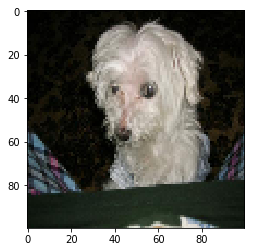

In [18]:
# Select one image from the testing dataset and display it
test_img = X_test[77, :, :, :]

plt.imshow(test_img)
plt.show()

In [19]:
# Add the image to a list and get array representation of the list
test_images = []

test_images.append(test_img)
test = np.array(test_images)

In [20]:
# Make a prediction and map the predicted class to the dog breed
prediction = model.predict_classes(test)
print(f"{prediction}: {dog_labels_categories[prediction[0]]}")

[73]: Maltese


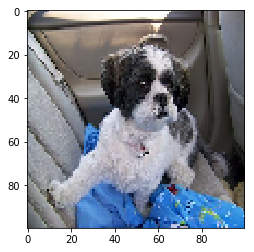

In [21]:
# Select another image from the testing dataset and display it
test_img2 = X_test[154, :, :, :]

plt.imshow(test_img2)
plt.show()

In [22]:
# Add the image to a list and get array representation of the list
test_images2 = []

test_images2.append(test_img2)
test2 = np.array(test_images2)

In [23]:
# Make a prediction and map the predicted class to the dog breed
prediction = model.predict_classes(test2)
print(f"{prediction}: {dog_labels_categories[prediction[0]]}")

[100]: Shih Tzu


### Make a prediction on a random image

In [24]:
# Function to preprocess the image 
def prepare_image(filepath):
    img = image.load_img(filepath, target_size=(100, 100, 3), \
            grayscale=False)
    img = image.img_to_array(img)
    img = img / 255
    test_images = []
    test_images.append(img)
    test = np.array(test_images)
    return test

In [25]:
# Upload a random imagem and preprocess it
os.chdir(root + "Images")

filename = "image5.jpg"

test = prepare_image(filename)

In [26]:
# Make a prediciton and map the predicted class to the dog breed
prediction = model.predict_classes(test)
print(f"{prediction}: {dog_labels_categories[prediction[0]]}")

[84]: Papillion
